In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [9]:
data = pd.read_csv("data.csv", sep = " ")

OЗависимость сопротивления от температуры:


 $Z = 1024 \frac{R}{R_C + R_0}$


где $R = R_0 e ^ {k(T - T_0)}$

При условии что $R_0 << R_C$, получим


 $Z = 1024 \frac{R_0 e ^ {k(T - T_0)}}{R_C}$

Зависимость экспотенциальная ее можно увидеть на графике

<AxesSubplot:xlabel='T', ylabel='Z'>

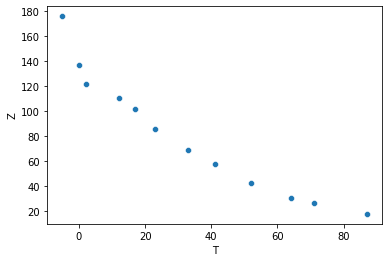

In [10]:
sns.scatterplot(x=data["T"], y=data["Z"])

Для получения зависости с помощью МНК, необходимо привести в линейный вид:


 $lnZ = ln(1024\frac{R_0}{R_C}) \cdot k(T-T_0)$


В итоге получим линейную зависимость:


 $lnZ = wT + w_0$


Где $w = kln(1024\frac{R_0}{R_C})$
    $w_0 = -kln(1024\frac{R_0}{R_C})T_0$

Сопротивление же получится:


$Z = e ^ {wT + w_0}$

Линейную зависимость $lnZ$ от $T$ можно показать на графике


In [11]:
data["log_Z"] = np.log(data["Z"])

In [12]:
data.head(12)

Z   T     log_Z
0    27  71  3.295837
1    31  64  3.433987
2    43  52  3.761200
3    58  41  4.060443
4    69  33  4.234107
5    86  23  4.454347
6   102  17  4.624973
7   111  12  4.709530
8   122   2  4.804021
9   137   0  4.919981
10   18  87  2.890372
11  176  -5  5.170484

<AxesSubplot:xlabel='T', ylabel='log_Z'>

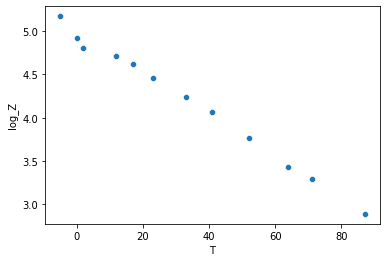

In [14]:
sns.scatterplot(x=data["T"], y=data["log_Z"])

Проверим полученное решение (-0.0236806 4.98004)

/home/orku/university/pythonProject/venv/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/orku/university/pythonProject/venv/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


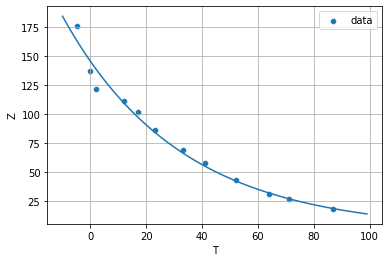

In [25]:
w = np.array([-0.0236806, 4.98004])

test_data = np.arange(-10, 100, 1)
test_data = test_data.reshape(len(test_data), 1)
test_data = np.hstack((test_data, np.ones((1, len(test_data))).reshape((len(test_data), 1))))
pred_test =  np.exp(test_data.dot(w))

sns.lineplot(test_data[:, 0], pred_test)
sns.scatterplot(data["T"], data["Z"], label='data')
plt.grid()